# Análise do Desempenho do Smoothsort com outros Algoritmos

### PPGCC - Programa de Pós-Graduação em Ciência da Computação
#### UNIFESP - Universidade Federal de São Paulo
#### São José dos Campos, São Paulo, Brasil

In [49]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')

In [50]:
# carregando dataset
df = pd.read_csv('dataset/all_assortments.csv', sep=',', index_col='id')

In [51]:
df.head()

,user_name,type_sort,mode_sort,len_vector,time_execute,count_compare,count_moves,time_start
id,,,,,,,,
0,aline,SelectionSort,Arranjos Ordenados (ASC),100,0.002676,4950,297,1.135194
1,aline,SelectionSort,Arranjos Ordenados (ASC),10,0.000070,45,27,1.134772
2,aline,SelectionSort,Arranjos Ordenados (DESC),100,0.000626,4950,297,1.229181
3,aline,SelectionSort,Arranjos Quase Ordenados (1),100,0.000683,4950,297,1.820128
4,aline,SelectionSort,Arranjos Ordenados (ASC),1000,0.926009,499500,2997,1.138276


In [52]:
df.shape

(195, 8)

In [53]:
# setando, tipos de algoritmos, arranjos e tamanhos
type_sort = list(df['type_sort'].unique())
modes = list(df['mode_sort'].unique())
len_vector = sorted(list(df['len_vector'].unique()))

In [54]:
df = df.round(2)

In [55]:
df.head()

,user_name,type_sort,mode_sort,len_vector,time_execute,count_compare,count_moves,time_start
id,,,,,,,,
0,aline,SelectionSort,Arranjos Ordenados (ASC),100,0.00,4950,297,1.14
1,aline,SelectionSort,Arranjos Ordenados (ASC),10,0.00,45,27,1.13
2,aline,SelectionSort,Arranjos Ordenados (DESC),100,0.00,4950,297,1.23
3,aline,SelectionSort,Arranjos Quase Ordenados (1),100,0.00,4950,297,1.82
4,aline,SelectionSort,Arranjos Ordenados (ASC),1000,0.93,499500,2997,1.14


## Desempenho Smoothsort

In [45]:
def plot_result_smooth(x, title='', label=''):
    plt.figure(figsize=(7, 3))
    graphics = 1
    legend = []
    plt.subplot(1 , 1, graphics)

    for mode in modes:
        data = df[(df['mode_sort'] == mode) & (df['type_sort'] == 'SmoothSort')].sort_values(by=['len_vector'])
        legend.append(mode)
        plt.plot(len_vector, data[x], marker='o', linewidth=2)

        #plt.xticks(len_vector)
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) 
        plt.xlabel('arranjos (10, 100, 1.000, 10.000, 100.000, 1.000.000)', fontsize=12) 
        plt.ylabel(label, fontsize=12) 
        plt.legend(legend, loc='best', prop={"size":12})
        graphics +=  1

    plt.savefig(f"graphics/smoothsort_{x}.png", format='png')

### Comparações

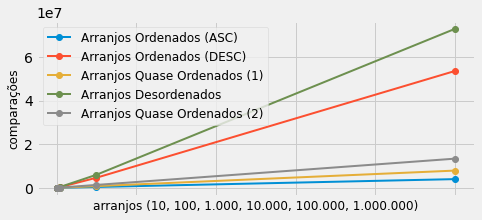

In [37]:
plot_result_smooth('count_compare', 'Comparações entre Chaves', 'comparações')

### Movimentações

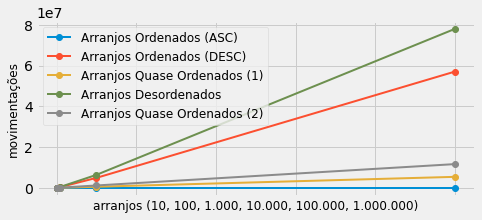

In [38]:
plot_result_smooth('count_moves', 'Movimentações entre Chaves', 'movimentações')

### Tempo de Processamento

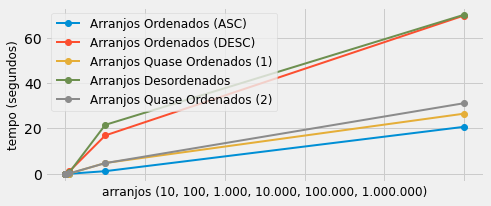

In [39]:
plot_result_smooth('time_execute', 'Tempo de Processamento', 'tempo (segundos)')

### Média das Métricas

In [47]:
df[df['type_sort'] == 'SmoothSort'].groupby(by=['type_sort', 'mode_sort'], as_index=False) \
    .agg({"time_execute": "mean", "count_compare": "mean", "count_moves": "mean"}).round(2)

,type_sort,mode_sort,time_execute,count_compare,count_moves
0,SmoothSort,Arranjos Desordenados,15.40,13224453.00,14151679.5
1,SmoothSort,Arranjos Ordenados (ASC),3.66,740684.00,0.0
2,SmoothSort,Arranjos Ordenados (DESC),14.65,9767947.83,10398416.5
3,SmoothSort,Arranjos Quase Ordenados (1),5.24,1464492.17,999972.0
4,SmoothSort,Arranjos Quase Ordenados (2),6.01,2477304.67,2157708.0


## Desempenho Smoothsort x O(n^2)

In [56]:
def plot_result_n2(x, label='', sorts=[]):
    plt.figure(figsize=(15, 10))
    graphics = 1
    vector = len_vector[0:5]

    for mode in modes:
        legend = []
        plt.subplot(3 , 2, graphics)

        for sort in sorts:
            data = df[(df['mode_sort'] == mode) & 
                      (df['type_sort'] == sort) &
                      (df['len_vector'] < 1000000)].sort_values(by=['len_vector'])
            legend.append(sort)
            plt.subplots_adjust(hspace=0.4, wspace=0.4)
            plt.plot(vector, data[x], marker='o', linewidth=2)
            
            plt.title(mode, fontsize=14)
            plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
            plt.xlabel('arranjos (10, 100, 1.000, 10.000, 100.000)', fontsize=12) 
            plt.ylabel(label, fontsize=12) 
            plt.legend(legend, loc='best', prop={"size":12})
        graphics +=  1

    plt.savefig(f"graphics/n^2_{x}.png", format='png')

### Tempo de Processamento

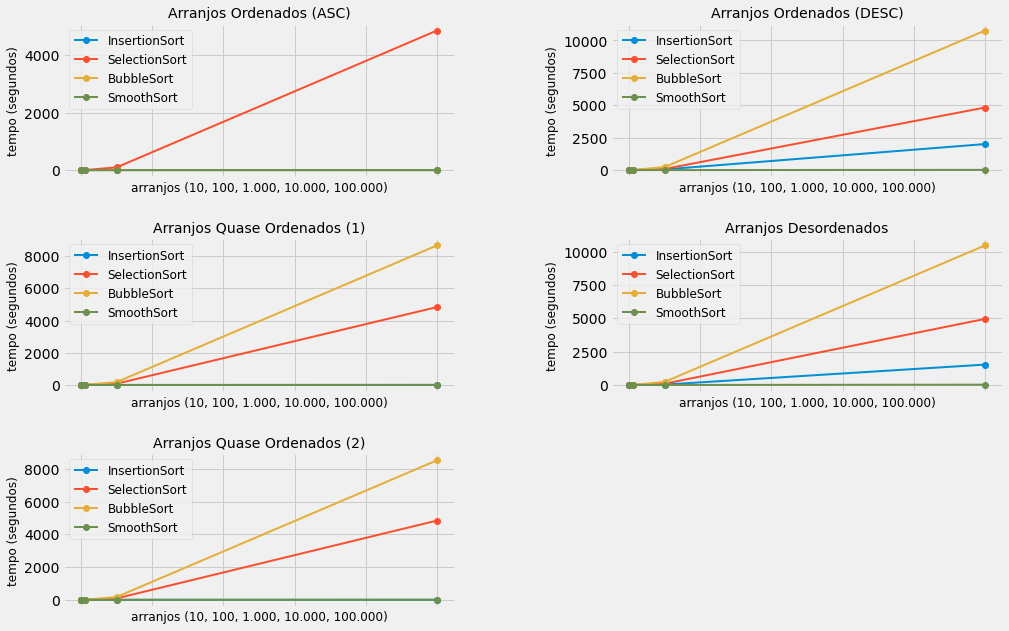

In [67]:
plot_result_n2('time_execute', 'tempo (segundos)', ['InsertionSort', 'SelectionSort', 'BubbleSort', 'SmoothSort'])

### Comparações

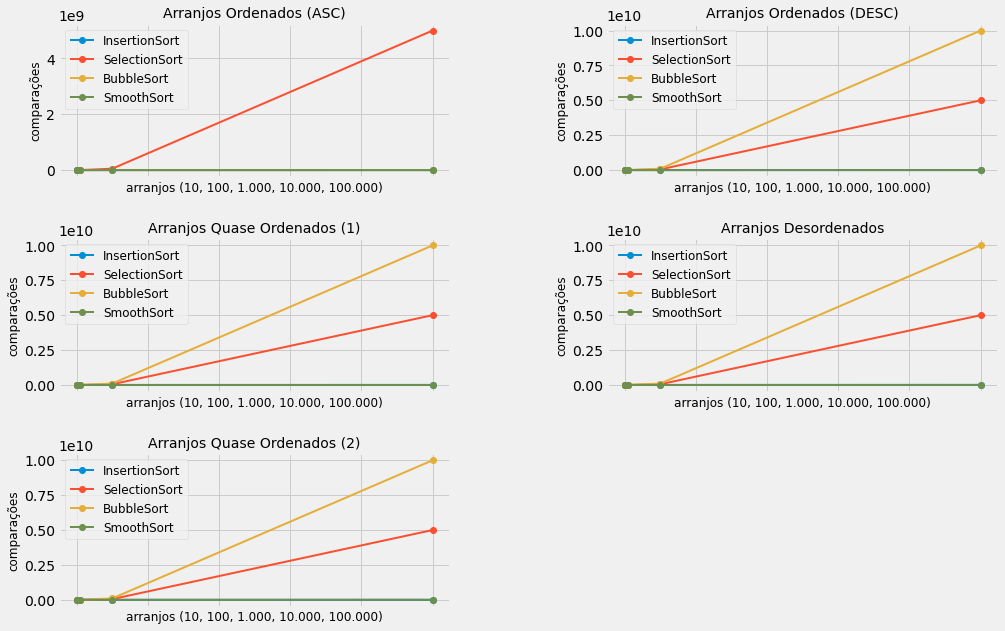

In [68]:
plot_result_n2('count_compare', 'comparações', ['InsertionSort', 'SelectionSort', 'BubbleSort', 'SmoothSort'])

### Movimentações

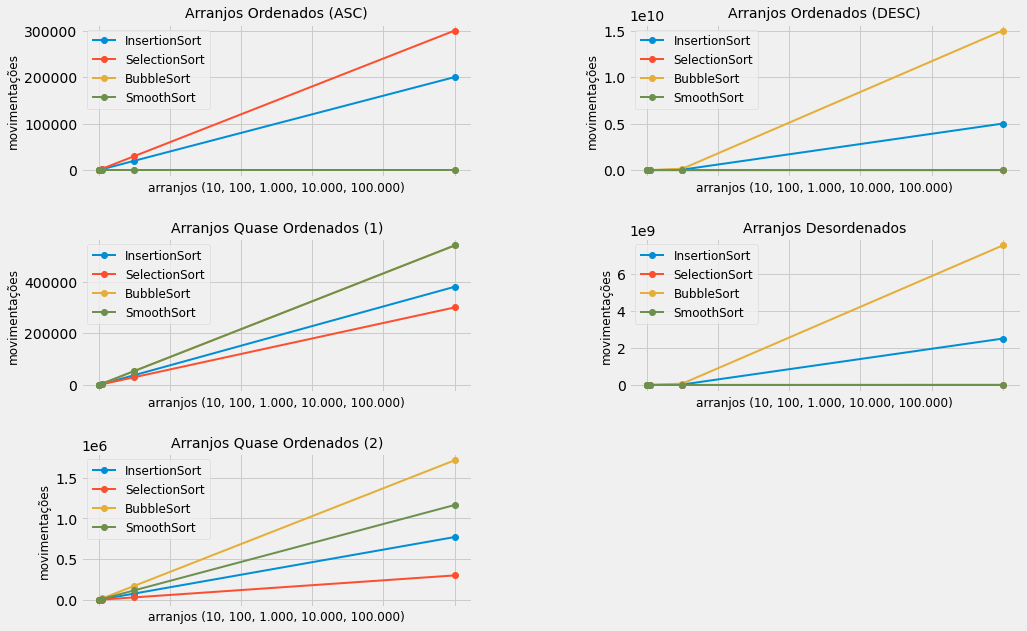

In [61]:
plot_result_n2('count_moves', 'movimentações', ['InsertionSort', 'SelectionSort', 'BubbleSort', 'SmoothSort'])

## Desempenho Smoothsort x O(n log n)

In [57]:
def plot_result_nlogn(x, label='', sorts=[]):
    plt.figure(figsize=(15, 10))
    graphics = 1

    for mode in modes:
        legend = []
        plt.subplot(3 , 2, graphics)

        for sort in sorts:
            data = df[(df['mode_sort'] == mode) & (df['type_sort'] == sort)].sort_values(by=['len_vector'])
            legend.append(sort)
            plt.subplots_adjust(hspace=0.4, wspace=0.4)
            plt.plot(len_vector, data[x], marker='o', linewidth=2)
            
            plt.title(mode, fontsize=14)
            plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
            plt.xlabel('arranjos (10, 100, 1.000, 10.000, 100.000, 1.000.000)', fontsize=12) 
            plt.ylabel(label, fontsize=12) 
            plt.legend(legend, loc='best', prop={"size":12})
        graphics +=  1

    plt.savefig(f"graphics/nlogn_{x}.png", format='png')

### Tempo de Processamento

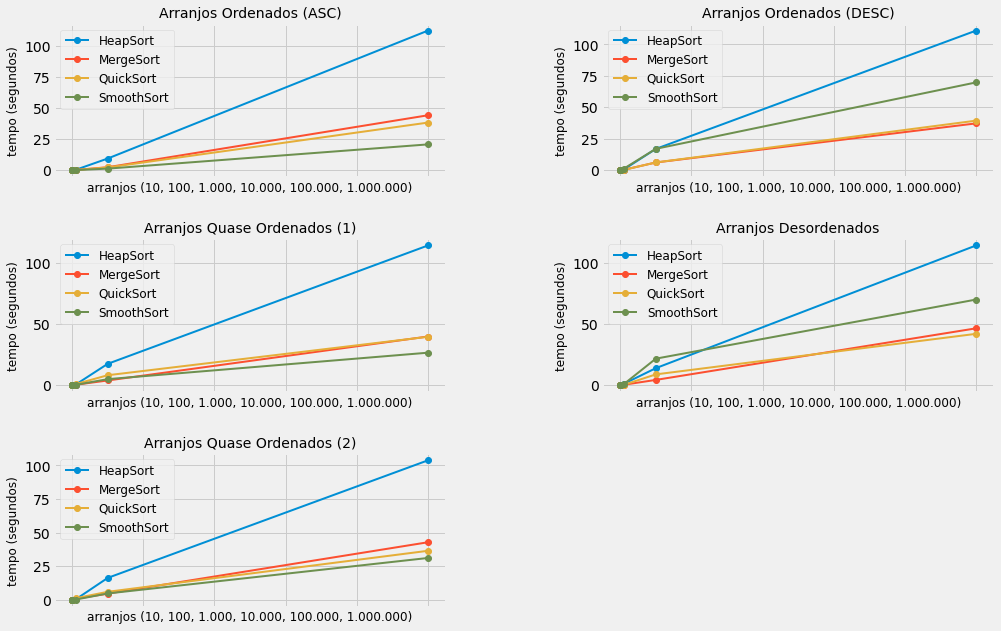

In [58]:
plot_result_nlogn('time_execute', 'tempo (segundos)', ['HeapSort', 'MergeSort', 'QuickSort', 'SmoothSort'])

### Comparações

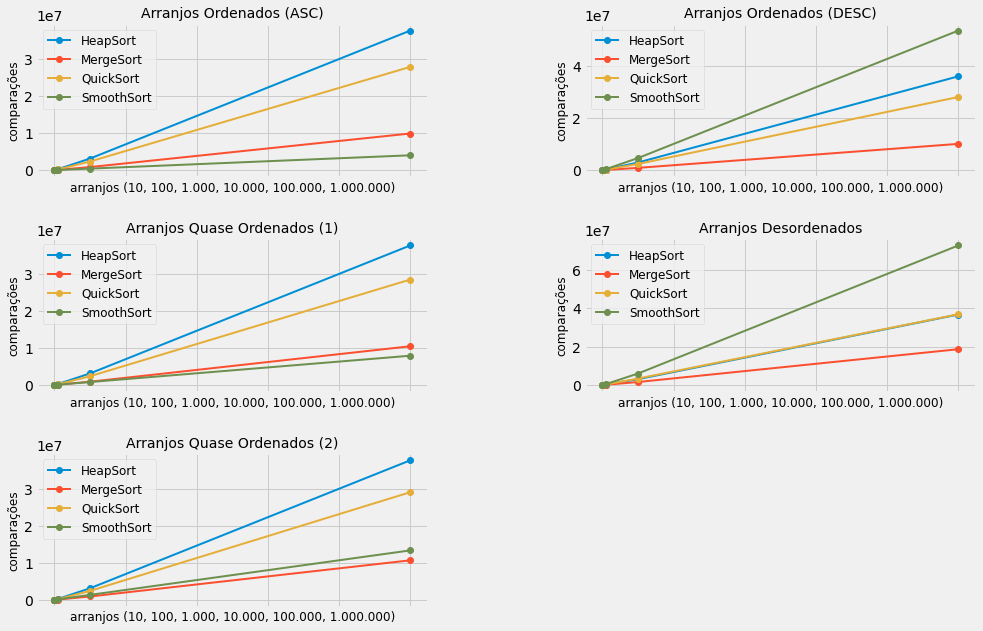

In [59]:
plot_result_nlogn('count_compare', 'comparações', ['HeapSort', 'MergeSort', 'QuickSort', 'SmoothSort'])

### Movimentações

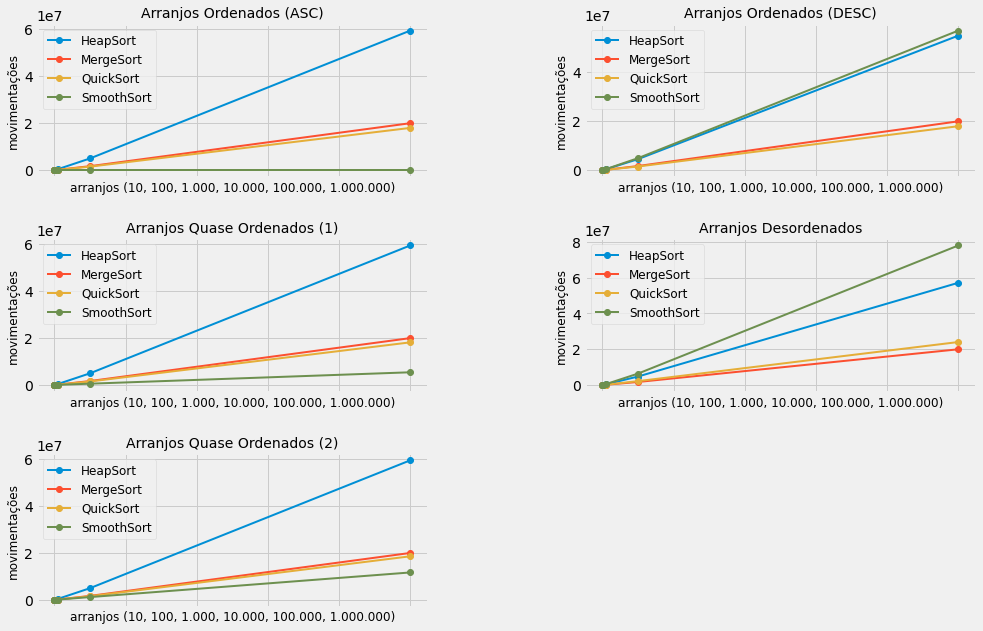

In [60]:
plot_result_nlogn('count_moves', 'movimentações', ['HeapSort', 'MergeSort', 'QuickSort', 'SmoothSort'])

### Média das Métricas

In [48]:
df.groupby(by=['type_sort', 'mode_sort'], as_index=False) \
    .agg({"time_execute": "mean", "count_compare": "mean", "count_moves": "mean"}).round(2)

,type_sort,mode_sort,time_execute,count_compare,count_moves
0,BubbleSort,Arranjos Desordenados,2141.96,2.020180e+09,1.518641e+09
1,BubbleSort,Arranjos Ordenados (ASC),0.00,2.222100e+04,0.000000e+00
2,BubbleSort,Arranjos Ordenados (DESC),2200.72,2.020180e+09,3.030270e+09
3,BubbleSort,Arranjos Quase Ordenados (1),1768.06,2.020180e+09,1.199718e+05
4,BubbleSort,Arranjos Quase Ordenados (2),1739.58,2.020180e+09,3.810090e+05
5,HeapSort,Arranjos Desordenados,21.55,6.677785e+06,1.037876e+07
6,HeapSort,Arranjos Ordenados (ASC),20.35,6.844625e+06,1.079049e+07
7,HeapSort,Arranjos Ordenados (DESC),21.40,6.528617e+06,9.978196e+06
8,HeapSort,Arranjos Quase Ordenados (1),22.07,6.853632e+06,1.080020e+07
9,HeapSort,Arranjos Quase Ordenados (2),20.08,6.857793e+06,1.079609e+07
